## Import Library

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Input Gambar

In [37]:
image_path = 'natnat2.jpg'
original_image_bgr = cv2.imread(image_path)

## Fungsi Perhitungan Mean Filter Manual

In [38]:
def manual_mean_filter(image, kernel_size):
    """
    Menerapkan filter mean secara manual ke citra.

    Args:
        image (np.array): Citra input (grayscale).
        kernel_size (int): Ukuran kernel (harus ganjil).

    Returns:
        np.array: Citra hasil setelah penerapan filter mean.
    """
    if kernel_size % 2 == 0:
        raise ValueError("Ukuran kernel harus ganjil.")

    rows, cols = image.shape
    padded_image = np.pad(image, kernel_size // 2, mode='reflect')
    output_image = np.zeros_like(image, dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            kernel_area = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.mean(kernel_area)

    return output_image.astype(np.uint8)

In [39]:
original_image_gray = cv2.cvtColor(original_image_bgr, cv2.COLOR_BGR2GRAY)

median_filtered_image_bgr = cv2.medianBlur(original_image_bgr, 5)
mean_filtered_image_gray = manual_mean_filter(original_image_gray, 5)

## Menampilkan Hasil

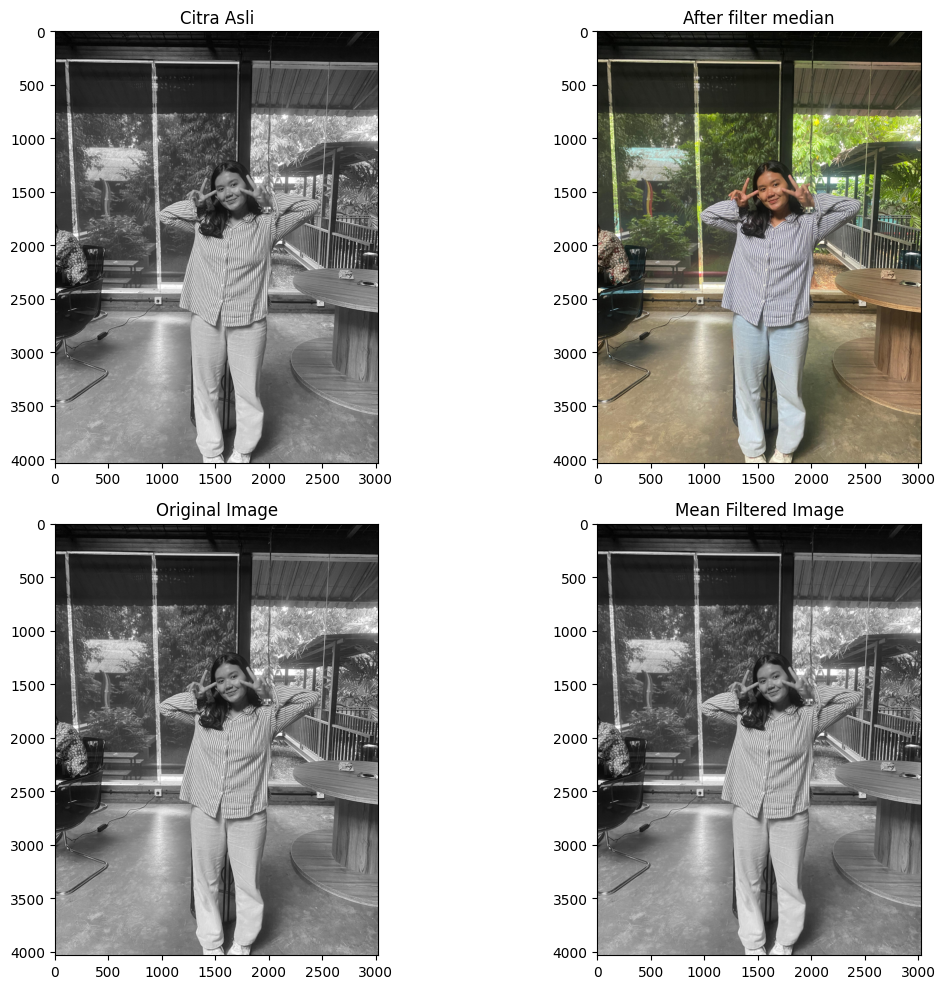

In [40]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_image_gray, cmap='gray')
plt.title('Citra Asli')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(median_filtered_image_bgr, cv2.COLOR_BGR2RGB))
plt.title('After filter median')

plt.subplot(2, 2, 3)
plt.imshow(original_image_gray, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 4)
plt.imshow(mean_filtered_image_gray, cmap='gray')
plt.title('Mean Filtered Image')

plt.tight_layout()
plt.show()